In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special as spe
from scipy.optimize import fsolve

In [3]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=z*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

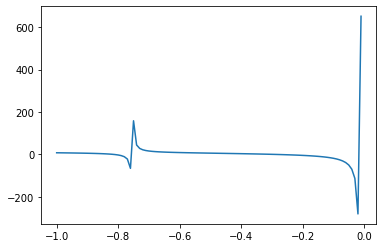

In [33]:
plt.figure()
x=np.arange(-1,0,0.01)
plt.plot(x, continuidad(x, 0, np.sqrt(40)))

In [18]:
continuidad(-0.678, 0, np.sqrt(20))

0.003709152935170046

In [22]:
def hallarCeros(f,l, rho,toi=0.0005):
    g=np.arange(-1,0, 0.00001)
    ceros=[]
    for i in range(len(g)):
        if np.abs(f(g[i],l,rho))<toi:
            ceros.append(np.round(g[i],3))       
    zeros=np.unique(ceros) 
    return zeros
hallarCeros(continuidad, 1, np.sqrt(40))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


array([-0.63 , -0.006])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[0. 0. 1. 1. 2. 3.] [-32.72 -12.   -25.2   -0.24 -15.96  -5.24]
[0. 0. 1. 1. 2. 3. 3. 4.] [-42.5  -20.7  -34.7   -7.   -25.05 -13.7  -13.65  -0.9 ]
[0. 0. 1. 1. 2. 2. 3. 4.] [-52.32 -29.82 -44.34 -15.24 -34.38  -0.18 -22.56  -9.18]
[0. 0. 1. 1. 2. 2. 3. 4. 5.] [-39.13  -4.34 -54.04 -23.94 -43.82  -7.49 -31.78 -17.92  -2.52]
[0. 0. 1. 1. 2. 2. 3. 4. 5.] [-48.56 -11.92 -63.76 -32.96 -53.44 -15.76 -41.12 -26.96 -11.04]


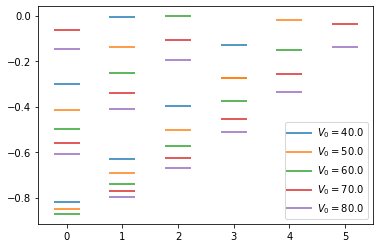

In [48]:
plt.figure()
rho=np.sqrt(np.arange(40,90,10))
l=np.arange(0,6,1)
for i in range(len(rho)):
    y=hallarCeros(continuidad, l[0], rho[i])
    x=np.ones(len(y))*l[0]
    for j in range(1,len(l)):
        a=hallarCeros(continuidad, l[j], rho[i])
        y=np.concatenate((y,a))
        x=np.concatenate((x,np.ones(len(a))*l[j]))
    print(x,y*rho[i]**2)
    plt.scatter(x,y, s=700, marker="_", label=r"$V_0=${}".format(round(rho[i]**2, 0)))
plt.legend()        

In [49]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=1j*rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,1j*z)
    f=-g/h
    return f
    

In [62]:
def sigma(x, rho):
    s=0
    for i in range(100):
        d=tanDl(x,i,rho)/(np.sqrt(1+tanDl(x,i,rho)**2))
        s+=-4*np.pi*(2*i+1)*(abs(d))**2/(rho**2*x)
    return s

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


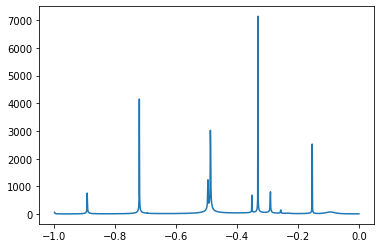

In [63]:
x=np.arange(-1,0.0,0.001)
plt.figure()
plt.plot(x, sigma(x,np.sqrt(40)))
#plt.ylim(0,1000)

In [57]:
x[sigma(x,np.sqrt(40))>50]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([-0.999, -0.896, -0.895, -0.894, -0.893, -0.892, -0.891, -0.89 ,
       -0.889, -0.888, -0.887, -0.73 , -0.729, -0.728, -0.727, -0.726,
       -0.725, -0.724, -0.723, -0.722, -0.721, -0.72 , -0.719, -0.718,
       -0.717, -0.716, -0.715, -0.714, -0.713, -0.712, -0.711, -0.51 ,
       -0.509, -0.508, -0.507, -0.506, -0.505, -0.504, -0.503, -0.502,
       -0.501, -0.5  , -0.499, -0.498, -0.497, -0.496, -0.495, -0.494,
       -0.493, -0.492, -0.491, -0.49 , -0.489, -0.488, -0.487, -0.486,
       -0.485, -0.484, -0.483, -0.482, -0.481, -0.48 , -0.479, -0.478,
       -0.477, -0.476, -0.475, -0.474, -0.473, -0.472, -0.471, -0.47 ,
       -0.353, -0.352, -0.351, -0.336, -0.335, -0.334, -0.333, -0.332,
       -0.331, -0.33 , -0.329, -0.328, -0.293, -0.292, -0.291, -0.29 ,
       -0.154])

In [22]:
x

array([0.9999])